## Importing data

In [1]:
import pandas as pd
import sklearn.datasets as db
import numpy as np

In [2]:
iris = db.load_iris()
iris = pd.DataFrame( np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']) )

sonar = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data',
                  names = ['parameter_' + str(i) if i <= 60 else 'class' for i in range(1,62)])


wine = db.load_wine()
wine = pd.DataFrame( np.c_[wine['data'], wine['target']], columns=np.append(wine['feature_names'], ['target']) )

In [3]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## Exploring the radial function

# $ f_{\mu_x, \mu_y, \sigma_x, \sigma_y}(x, y) = e^{\frac{(x - \mu_x)^2}{2\sigma_x^2} + \frac{(y - \mu_y) ^2}{2\sigma_y^2}} $

In [4]:
import math

def my_activation_function(x, y, x0 = 0, y0 = 0, sigma_x = 1, sigma_y = 1, amp = 1):
    return amp * math.exp( -( (x-x0)**2 / 2 * sigma_x**2 + (y-y0)**2 / 2 * sigma_y**2 ) )

In [5]:
x = np.linspace(-3, 3, 65)
y = np.linspace(-3, 3, 65)

x_data = []
y_data = []
z_data = []

z2_data = []
colors = []
colors2 = []

def get_color(x):
    return 255*x

for i in range(len(x)):
    for j in range(len(y)):
        x_data.append(x[i])
        y_data.append(y[j])
        
        z = my_activation_function(x[i], y[j])
        z_data.append(z)
        colors.append(get_color(z))
        
        z2 = my_activation_function(x[i], y[j], sigma_x = .5, sigma_y = 2, x0 = 1, y0 = 1)
        z2_data.append(z2)
        colors2.append(get_color(z2))

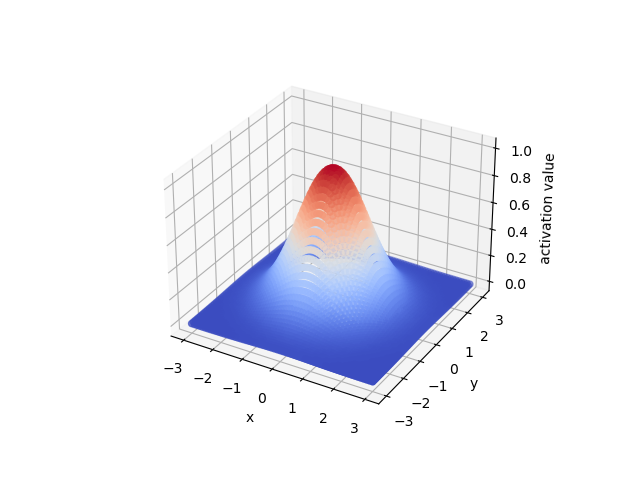

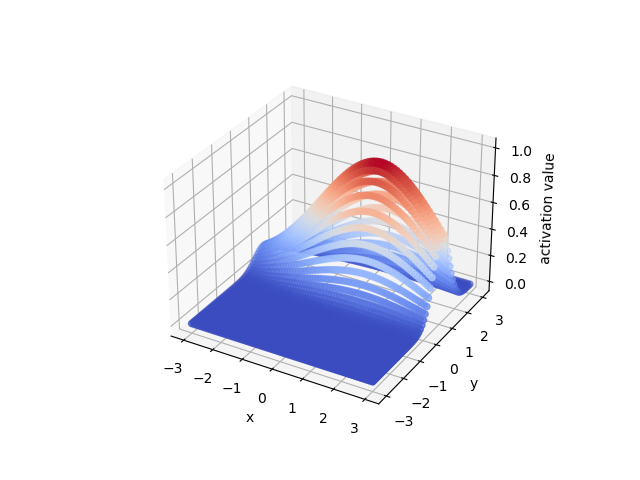

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('activation value')
ax.scatter(x_data, y_data, z_data, c = colors, cmap='coolwarm')

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('activation value')
ax2.scatter(x_data, y_data, z2_data, c = colors2, cmap='coolwarm')

## In neural network We have 1 incoming value to activation function, so the case gets easier

# $ f_{\sigma}(r) = e^{-\frac{r^2}{2\sigma^2}} $ <br/>
# $ f'_{\sigma}(r) =  -\frac{r}{e^{\frac{r^2}{2\sigma^2}} \cdot \sigma^2} $

## Prepare data

In [7]:
input_iris_data = iris.iloc[:, :4].to_numpy()
input_iris_data_targets = iris.iloc[:, 4].to_numpy()

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(input_iris_data)
scaled_iris_x = sc.transform(input_iris_data)

In [9]:
# Resting two sets

# Sonar set
input_sonar_data = sonar.iloc[:,:-1].to_numpy()

input_sonar_data_targets = sonar.iloc[:,-1].to_numpy()
input_sonar_data_targets[input_sonar_data_targets == 'R'] = 0
input_sonar_data_targets[input_sonar_data_targets == 'M'] = 1
input_sonar_data_targets = input_sonar_data_targets.astype(float)

# Wine set
input_wine_data = wine.iloc[:, :-1].to_numpy()
input_wine_data_targets = wine.iloc[:, -1].to_numpy()

## Activation function we are going to use

In [10]:
my_sigma = 1.2

# Gauss function and its derivative
def my_activation_function(r, sigma = my_sigma):
    return np.exp( - ( r**2 / (2 * sigma**2) ) ) # use numpy.exp instead of math.exp (entrire vectors may be calculated)

def my_derivatived_activation_function(r, sigma = my_sigma):
    sigma_square = sigma**2
    return -r / ( np.exp(r**2 / (2 * sigma_square)) * sigma_square)

# If you are willing to use function from Rapid Miner:
def GELU(x):
    return .5*x * (1 + np.tanh( (2 / math.pi)**0.5 * (x + (0.044715 * x**3)) ))

def GELU_derivative(x):
    
    def hiperbolic_secant(x):
        return 1 / np.cosh(x)
    
    x_power_3 = x**3
    return 0.5*np.tanh(.0356774*(x_power_3) + .797885) + (.0535161*(x_power_3) + .398942*x) * hiperbolic_secant(.0356774*(x_power_3)**2 + .797885*x)**2 + .5

## Neural Network with radial activation

In [14]:
class MLP():
    
    def __init__(self, activation_function, derivative_function):
        self.activation_function = activation_function
        self.derivative_function = derivative_function
        self.hidden_layers = []
        self.output_layer = None
        self.loss = None
        
        
    def softmax(self, results: np.ndarray) -> np.ndarray:
        
        e = np.exp(results)
        soft_sum = 0
        
        for i in e:
            soft_sum += i
            
        return e / soft_sum
    
    
    def softmax_derivative(self, activations_values_in_softmax_layers: np.ndarray, target: int) -> np.ndarray:
        targets_amount = len(activations_values_in_softmax_layers)
        gradient = np.zeros((targets_amount, 1))
        
        for i in range(targets_amount):
            gradient[i] = -activations_values_in_softmax_layers[target] * activations_values_in_softmax_layers[i]
            
        gradient[target] = activations_values_in_softmax_layers[target] * (1 - activations_values_in_softmax_layers[target])
        
        return gradient
    
        
    def cross_entropy(self, target, predictions) -> float:
        targets = np.zeros(predictions.shape)
        targets[int(target)] = 1
        return -targets * np.log(predictions)
        
    
    def initialize_network(self, neural_architekture = [4, 4, 2]) -> None:
        """
        This method build up the architekture of network.
        
        Parameters
        ----------
        neural_architekture: list
            |
            |
            --->Define the network architekture.
                Default settings: 1 input layer with 4 signals, 
                    1 hidden layer with 4 neurons and output layer with 2 neurons.
                Note that the last parameters always describes amount of classes.
                WARNING: This parameter cannot be empty! 
        """
        
        if len(neural_architekture) < 3:
            raise ValueError('Inapropriate architecture definition')
        
        self.hidden_layers = []
        self.output_layer = None
        self.output_bias = np.random.rand(neural_architekture[-1], 1) - .5 
        self.loss = []
        self.hidden_biases = []
            
        for i in range(1, len(neural_architekture) - 1):
            layer = np.random.rand(neural_architekture[i], neural_architekture[i - 1]) - .5
            self.hidden_layers.append(layer)
            self.hidden_biases.append(np.random.rand(neural_architekture[i], 1) - .5)
            
        self.output_layer = np.random.rand(neural_architekture[-1], neural_architekture[-2]) - .5
        
        
    def predict(self, input_data) -> np.ndarray:
        """
        Calculate the probability of each class.
        
        Parameters
        ----------
        input_data: numpy.ndarray
            observation vector of size N x 1, which N was given by user during initialization
            
        Returns
        -------
        prediction: numpy.ndarray
            probability of each class the object belongs to.
            Vector has shape M x 1, which M was given by user during initialization
        """
        
        # --- feed forward ---
        
        if(input_data.ndim != 2):
            raise ValueError("Not propriate input")
        
        input_signal = input_data.T if input_data.shape[0] == 1 else input_data
        hidden_result = self.hidden_layers[0] @ input_signal
        
        hidden_result = self.activation_function(hidden_result  + self.hidden_biases[0])
        
        if(hidden_result.shape[0] == 1):
            hidden_result = hidden_result.reshape(-1, 1)
        
        self.last_hidden_activated_outputs = []
        self.last_hidden_activated_outputs.append(hidden_result)
        
        for layer in range(1, len(self.hidden_layers)):
            
            hidden_result = self.hidden_layers[layer] @ hidden_result
            
            hidden_result = self.activation_function(hidden_result  + self.hidden_biases[layer])
            
            if(hidden_result.shape[0] == 1):
                hidden_result = hidden_result.reshape(-1, 1)
            
            self.last_hidden_activated_outputs.append(hidden_result)
            
            
        if(hidden_result.shape[0] == 1):
            hidden_result = hidden_result.reshape(-1, 1)
            
        output_result = self.output_layer @ hidden_result
        self.last_not_activated_output = output_result
        
        # softmax activation layer
        output_result = self.softmax(output_result + self.output_bias)
            
            
        self.last_activated_output = output_result;
        
        return output_result
        
        
    def train(self, input_data: np.ndarray, target: int, learning_rate = .1) -> None:
        """
        Train neural network. Classes must be within range [0-N], where N > 1
        """
        
        if input_data.ndim != 2:
            raise ValueError("Not propriate input")
            
        input_signal = input_data.T if input_data.shape[0] == 1 else input_data
        
        predictions = self.predict(input_data)
        
        current_loss = self.cross_entropy(target, predictions)
        self.loss.append(np.max(current_loss))
        
        targets = np.zeros(len(predictions), dtype=int)
        targets[int(target)] = 1
        targets = np.reshape(targets, (-1, 1))
        
        output_delta =  targets - predictions
            
        # print("Predictions for class", int(target), "\n", predictions.T, "\nDelta equals:", output_delta, "\n\n")
        if output_delta.shape[0] == 1:
            output_delta = output_delta.reshape(-1, 1)
        
        hidden_error = self.output_layer.T @ output_delta
        self.output_layer += output_delta @ self.last_hidden_activated_outputs[-1].T * learning_rate
        self.output_bias += output_delta * learning_rate
        
        for i in range(len(self.hidden_layers) - 1, 0, -1):
            hidden_delta = hidden_error * self.derivative_function(self.last_hidden_activated_outputs[i])
            
            hidden_error = self.hidden_layers[i].T @ hidden_delta
            self.hidden_layers[i] += hidden_delta @ self.last_hidden_activated_outputs[i - 1].T * learning_rate
            self.hidden_biases[i] += hidden_delta * learning_rate
            
        input_error = hidden_error
        input_delta = input_error * self.derivative_function(self.last_hidden_activated_outputs[0])
        
        self.hidden_layers[0] += input_delta @ input_signal.T * learning_rate
        self.hidden_biases[0] += input_delta * learning_rate
        
        
    def draw_loss_chart(self) -> None:
        fig, ax = plt.subplots()
        ax.set_xlabel('step')
        ax.set_ylabel('loss')
        ax.plot(self.loss)

In [15]:
def net_accuracy(net, x_test, y_test):
    
    labels = []

    for x_i in x_test:
        pred = net.predict(x_i.reshape(-1, 1))
        labels.append(np.argmax(pred))
        
    return np.mean(np.array(labels) == y_test)

129 Acc: 0.9533333333333334


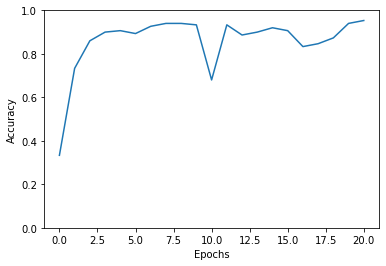

0: Prediction: [[0.50450743 0.05248892 0.44300365]], predicted class: 0, true class: 0
1: Prediction: [[0.49291153 0.04727654 0.45981193]], predicted class: 0, true class: 0
2: Prediction: [[0.4891461 0.0462139 0.46464  ]], predicted class: 0, true class: 0
3: Prediction: [[0.48926379 0.04706749 0.46366871]], predicted class: 0, true class: 0
4: Prediction: [[0.49836008 0.05499633 0.44664359]], predicted class: 0, true class: 0
5: Prediction: [[0.50956592 0.09247016 0.39796393]], predicted class: 0, true class: 0
6: Prediction: [[0.47862232 0.05936893 0.46200875]], predicted class: 0, true class: 0
7: Prediction: [[0.50246965 0.05192664 0.44560371]], predicted class: 0, true class: 0
8: Prediction: [[0.4829813  0.04351154 0.47350716]], predicted class: 0, true class: 0
9: Prediction: [[0.49970479 0.04229137 0.45800384]], predicted class: 0, true class: 0
10: Prediction: [[0.52009517 0.05863514 0.42126968]], predicted class: 0, true class: 0
11: Prediction: [[0.49577355 0.05341584 0.450

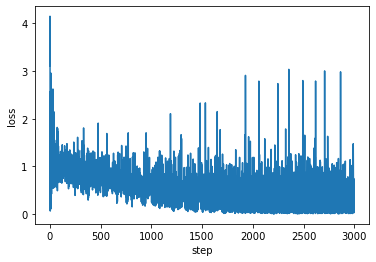

In [24]:
import random
import matplotlib.pyplot as plt

x_train = input_iris_data
y_train = input_iris_data_targets

x_train = (x_train - np.mean(x_train, axis=0) )/ np.std(x_train, axis=0)

nn = MLP(my_activation_function, my_derivatived_activation_function)
# 4 inputs for 4 input signals, 3 outputs for 3 classes. Rest parametrs depends on your preferences
nn.initialize_network([4,30,3]) 
# print('Init',nn.hidden_layers)

acc = [ net_accuracy(nn, x_train, y_train) ]
n_epochs = 20

ind = np.arange(len(x_train))

for i in range(n_epochs):
    np.random.shuffle(ind)
    # r = random.randint(0, len(input_iris_data) - 1)
    for i in ind:
        nn.train(np.array([x_train[i]]), y_train[i], learning_rate=0.01)
    acc.append(net_accuracy(nn, x_train, y_train)) 

print(f'{i} Acc: {net_accuracy(nn, x_train, y_train)}')

predicted_labels = np.zeros(y_train.shape)
plt.figure()
plt.plot(range(len(acc)), acc)
plt.ylim([0, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

nn.draw_loss_chart()
for i in range(len(x_train)):
    pred = nn.predict(np.array([x_train[i]])).T
    predicted_labels[i] = np.argmax(pred)
    
    print(f"{i}: Prediction: {pred}, predicted class: {int(predicted_labels[i])}, true class: {int(y_train[i])}")

## With Sci-kit learn

In [76]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(input_iris_data, input_iris_data_targets)
gpc.score(input_iris_data, input_iris_data_targets)

0.9866666666666667

## Crossvalidation

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

k = 10
n_epochs = 20
verbose = 1 # 0 - none, 1 - some info, 2 - full info

sets = [
    [input_iris_data, input_iris_data_targets],
    [input_sonar_data, input_sonar_data_targets],
    [input_wine_data, input_wine_data_targets]
]

sets_names = ['Iris', 'Sonar', 'Wine']

for set_i, data_set in enumerate(sets):
    
    print(f'Set name: {sets_names[set_i]}')

    x, y = sets[set_i][0], sets[set_i][1]
    
    accuraces = []

    #standarization
    x = (x - np.mean(x, axis=0) )/ np.std(x, axis=0)

    for i in range(1, k + 1):

        acc = []

        x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size = 0.20,)

        nn = MLP(my_activation_function, my_derivatived_activation_function)
        nn.initialize_network([x.shape[1],64,len(np.unique(y))])

        ind = np.arange(len(x_train))

        for epoch in range(n_epochs):
            np.random.shuffle(ind)

            for index in ind:
                nn.train(np.array([x_train[index]]), y_train[index], learning_rate=0.01)
            acc.append(net_accuracy(nn, x_train, y_train)) 

        if verbose > 1:
            print(f'{i} Train accuracy: {net_accuracy(nn, x_train, y_train)}')

            predicted_labels = np.zeros(y_train.shape)
            plt.figure()
            plt.plot(range(len(acc)), acc)
            plt.ylim([0, 1])
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.show()

        cur_acc = net_accuracy(nn, x_test, y_test) * 100

        accuraces.append(cur_acc)

        if verbose > 0:
            print(f'k-fold {i}/{k}, accuracy: {round(cur_acc, 3)}%')

        if verbose > 1:
            print(f'{i} Test accuracy: {cur_acc}')

    mean_acc = np.mean(accuraces)
    mean_acc = round(mean_acc, 3)

    print(f'Mean Accuracy from Crossvalidation: {mean_acc}% +- {round(np.std(accuraces), 3)}% ({sets_names[set_i]})')

Set name: Iris
k-fold 1/10, accuracy: 96.667%
k-fold 2/10, accuracy: 86.667%
k-fold 3/10, accuracy: 90.0%
k-fold 4/10, accuracy: 86.667%
k-fold 5/10, accuracy: 93.333%
k-fold 6/10, accuracy: 100.0%
k-fold 7/10, accuracy: 93.333%
k-fold 8/10, accuracy: 86.667%
k-fold 9/10, accuracy: 93.333%
k-fold 10/10, accuracy: 86.667%
Mean Accuracy from Crossvalidation: 91.333% +- 4.522% (Iris)
Set name: Sonar
k-fold 1/10, accuracy: 54.762%
k-fold 2/10, accuracy: 52.381%
k-fold 3/10, accuracy: 69.048%
k-fold 4/10, accuracy: 59.524%
k-fold 5/10, accuracy: 52.381%
k-fold 6/10, accuracy: 52.381%
k-fold 7/10, accuracy: 59.524%
k-fold 8/10, accuracy: 76.19%
k-fold 9/10, accuracy: 59.524%
k-fold 10/10, accuracy: 59.524%
Mean Accuracy from Crossvalidation: 59.524% +- 7.377% (Sonar)
Set name: Wine
k-fold 1/10, accuracy: 94.444%
k-fold 2/10, accuracy: 83.333%
k-fold 3/10, accuracy: 86.111%
k-fold 4/10, accuracy: 86.111%
k-fold 5/10, accuracy: 80.556%
k-fold 6/10, accuracy: 80.556%
k-fold 7/10, accuracy: 77.7

## Baserate

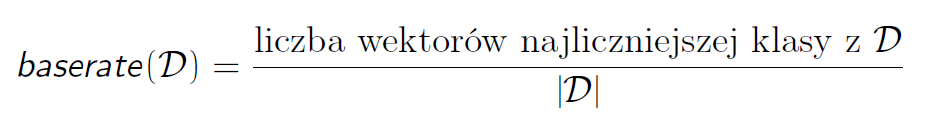

In [77]:
print("Baserate for Iris is", np.round(np.max(iris['target'].value_counts()) / len(iris) * 100, 2), "%")

Baserate for Iris is 33.33 %


In [78]:
print("Baserate for Sonar is", np.round(np.max(sonar['class'].value_counts()) / len(sonar) * 100, 2), "%")

Baserate for Sonar is 53.37 %


In [79]:
print("Baserate for Sonar is", np.round(np.max(wine['target'].value_counts()) / len(wine) * 100, 2), "%")

Baserate for Sonar is 39.89 %


## Naive Bayes - Iris

Iris set
Train: 96.0 %
Test: 96.0 %


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginica')]

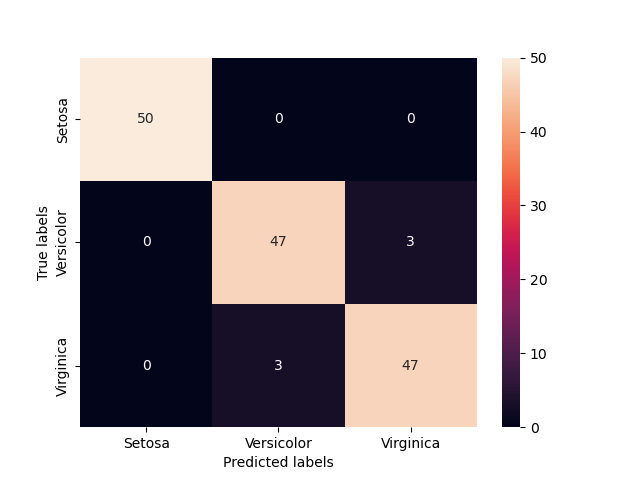

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

X_train = X_test = input_iris_data
y_train = y_test = input_iris_data_targets

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
ac = accuracy_score(y_test,y_pred)
ac_train = accuracy_score(bayes.predict(X_train), y_train)
cm = confusion_matrix(y_test, y_pred)

print("Iris set")
print("Train:", ac_train*100, "%")
print("Test:", ac*100, "%")

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

iris_names = ['Setosa','Versicolor','Virginica']
ax.xaxis.set_ticklabels(iris_names)
ax.yaxis.set_ticklabels(iris_names)

## Naive Bayes - Sonar

Sonar set
Train: 73.07692307692307 %
Test: 73.07692307692307 %


[Text(0, 0.5, 'Rock'), Text(0, 1.5, 'Mine')]

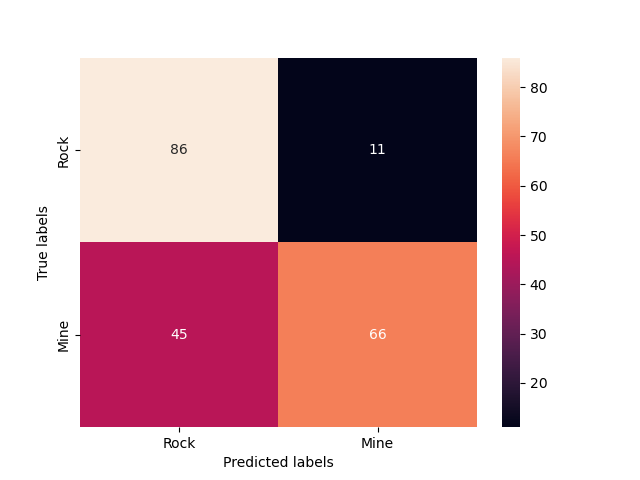

In [139]:
X_train = X_test = input_sonar_data
y_train = y_test = input_sonar_data_targets

bayes = GaussianNB()
bayes.fit(X_train, y_train.astype(float))

y_pred = bayes.predict(X_test)
ac = accuracy_score(y_test,y_pred)
ac_train = accuracy_score(bayes.predict(X_train), y_train)
cm = confusion_matrix(y_test, y_pred)

print("Sonar set")
print("Train:", ac_train*100, "%")
print("Test:", ac*100, "%")

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

sonar_names = ['Rock','Mine']
ax.xaxis.set_ticklabels(sonar_names)
ax.yaxis.set_ticklabels(sonar_names)

## Naive Bayes - Wine

Wine set
Train: 98.87640449438202 %
Test: 98.87640449438202 %


[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')]

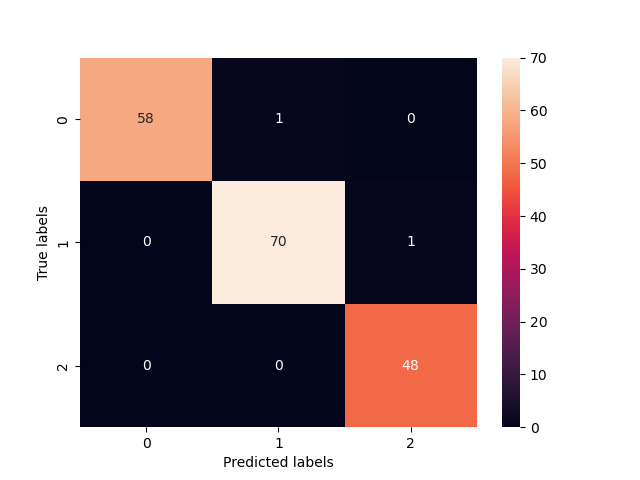

In [138]:
X_train = X_test = input_wine_data
y_train = y_test = input_wine_data_targets

bayes = GaussianNB()
bayes.fit(X_train, y_train.astype(float))

y_pred = bayes.predict(X_test)
ac = accuracy_score(y_test,y_pred)
ac_train = accuracy_score(bayes.predict(X_train), y_train)
cm = confusion_matrix(y_test, y_pred)

print("Wine set")
print("Train:", ac_train*100, "%")
print("Test:", ac*100, "%")

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

sonar_names = [0, 1, 2]
ax.xaxis.set_ticklabels(sonar_names)
ax.yaxis.set_ticklabels(sonar_names)